#============================================================================================================================================
# **Física Teórica 3 (Mecánica Estadística): Teórica 11 - Extras**
#============================================================================================================================================

# Magnetización en la aproximación de Bragg-Williams
Este notebook busca los ceros de la relación para la magnetización media (o de la variable de rango largo L) en la aproximación de campo medio de Bragg-Williams para el modelo de Ising. La relación para este problema (con campo magnético externo B = 0) es L = tanh(qJL/kT). Usamos el método de la secante para calcular los ceros de esta relación a diferentes temperaturas, y graficamos el resultado. Recuerden ejecutar cada celda con SHIFT+ENTER.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

def f(x): 										   # Definimos la función a la que le queremos buscar los ceros
	return x - np.tanh(beta*q*J*x)

In [ ]:
# Definimos parámetros para el sistema
q   = 4   # Número de primeros vecinos
J   = 1   # Energía de interacción entre primeros vecinos
kTc = q*J # Temperatura crítica

In [ ]:
# Calculamos los ceros de la función entre kT=0 y kT=2*kTc. Generamos un vector con temperaturas en este rango.
kT = np.arange(.0001*2*kTc, 2*kTc, .0001*2*kTc)
L0 = np.zeros(np.size(kT))

# Usamos el método de la secante para encontrar los ceros para cada temperatura
x = 1.1 # Guess inicial
for i in range(np.size(kT)):
	beta = 1./kT[i]
	L0[i] = newton(f, x, tol=1e-08, maxiter=100)

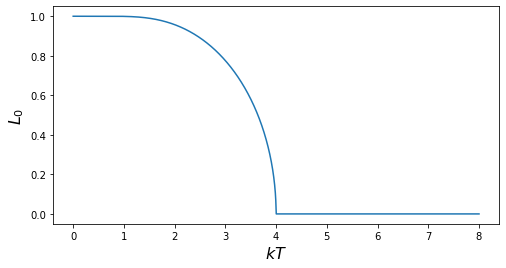

In [ ]:
plt.figure(figsize=(8,4))        # Graficamos el resultado
plt.plot(kT,L0)
plt.xlabel(r'$kT$',fontsize=16)
plt.ylabel(r'$L_0$',fontsize=16)
plt.show()

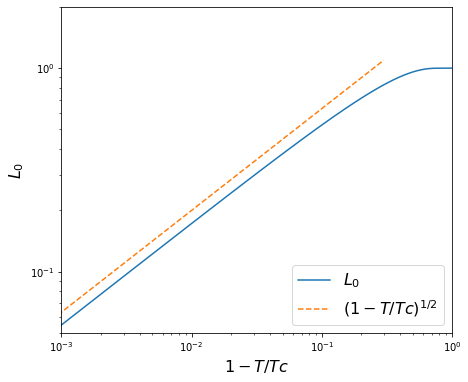

In [ ]:
plt.figure(figsize=(7,6))                                          												 # Verificamos el comportamiento cerca de la temperatura crítica, y el valor del exponente crítico
plt.loglog(1-kT/kTc,L0,label=r'$L_0$')                                                     # Graficamos 1-T/Tc vs. L en log-log. La pendiente para 1-T/Tc pequeño es el exponente
plt.loglog(np.arange(0,.3,.001),2*np.arange(0,.3,.001)**.5,'--',label=r'$(1-T/Tc)^{1/2}$') # Indicamos una ley de potencias con exponente 1/2
plt.xlabel(r'$1-T/Tc$',fontsize=16)
plt.ylabel(r'$L_0$',fontsize=16)
plt.legend(loc='lower right',fontsize=16)
plt.xlim([1e-3,1])
plt.ylim([5e-2,2])
plt.show()

#———————————————————————————————————————————————————————————————————————————————————————————————

#———————————————————————————————————————————————————————————————————————————————————————————————